# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import string
import math
import seaborn as sns
import pickle

In [2]:
# Show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

## Load Data

In [3]:
# Load data
df = pd.read_csv(
    'data/reviews.csv',
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


In [4]:
df.nunique()

Clothing ID                  531
Age                           77
Title                      13142
Review Text                18439
Positive Feedback Count       79
Division Name                  2
Department Name                6
Class Name                    14
Recommended IND                2
dtype: int64

## Preparing features (`X`) & target (`y`)

In [5]:
data = df
# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


In [6]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

In [7]:
data['Recommended IND'].value_counts()

Recommended IND
1    15053
0     3389
Name: count, dtype: int64

# Your Work

## Data Exploration

In [8]:
import spacy
nlp = spacy.load('en_core_web_sm')

#### Number of characters in the title

From the below histogram, we can observe that majority of the title contains less than 30 characters 

<Axes: >

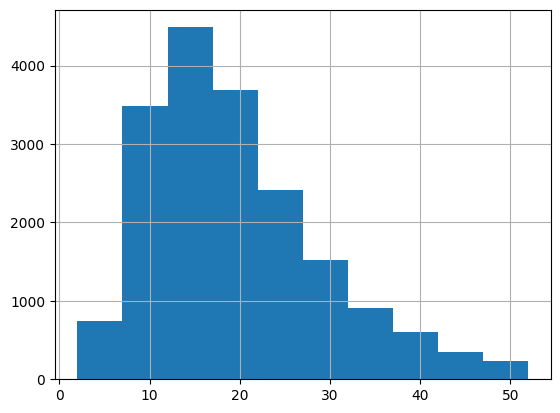

In [9]:
data['Title'].str.len().hist()

#### Number of words in the title

<Axes: >

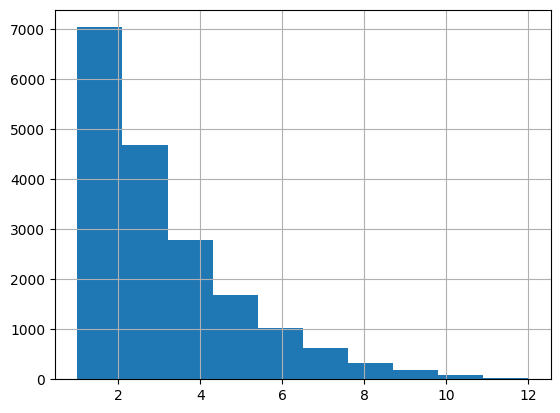

In [10]:
data['Title'].str.split().map(lambda x: len(x)).hist()

#### Number of characters in review

<Axes: >

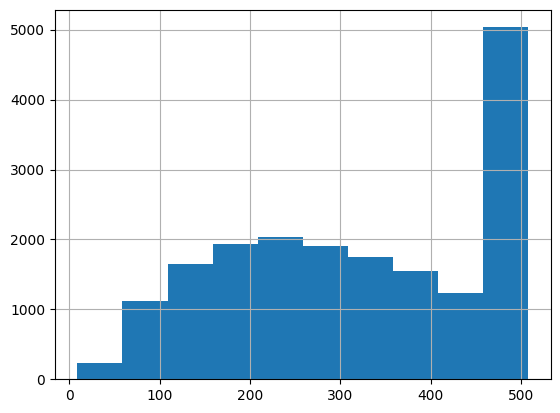

In [11]:
data['Review Text'].str.len().hist()

#### Number of words in review

<Axes: >

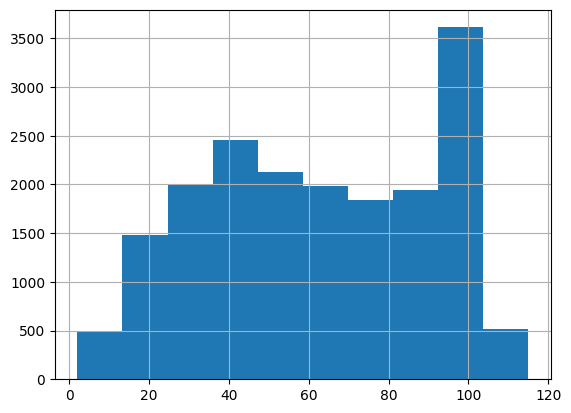

In [12]:
data['Review Text'].str.split().map(lambda x: len(x)).hist()

#### Number of stop words used in a review

<Axes: >

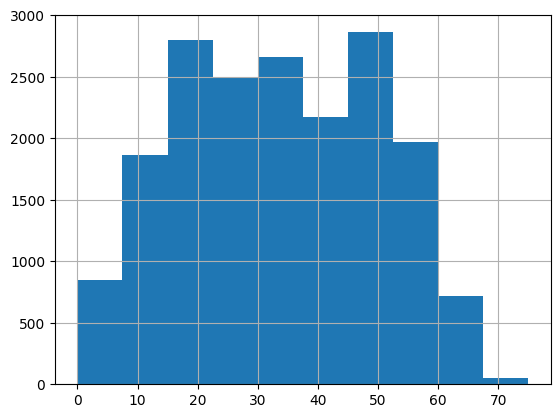

In [13]:
from spacy.lang.en import stop_words
stop=list(stop_words.STOP_WORDS)
data['Review Text'].apply(lambda words : [word.lower() for word in words.split() if word.lower() in stop]).map(lambda x:len(x)).hist()

Below plot shows the average word length in review text. Majority of the review consist of word length less than 5.

<Axes: >

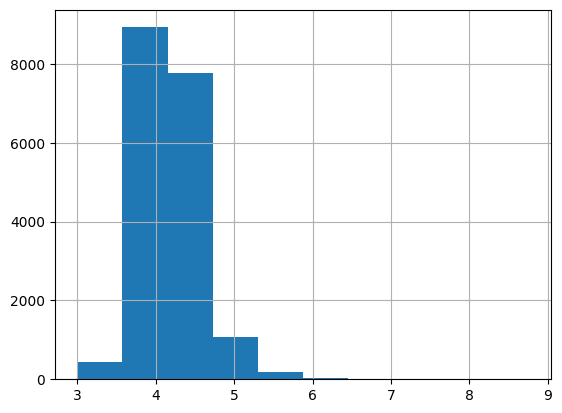

In [14]:
data['Review Text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

#### Plotting stop words

In [15]:
from collections import defaultdict

In [16]:
def plot_top_stopwords_barchart(text):
    '''
    Creates a histogram to show the stop words in the passed dataframe columns
    
    Parameters:
    text (pd.DataFrame Series): Pd Series containing the text column

    returns: nothing
    '''
    stop=stop_words.STOP_WORDS
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:20]
    x,y=zip(*top)
    plt.bar(x,y)
    plt.xticks(rotation=45)

There are lot of stop words used in the review. This could be easily removed during the preprocessing steps of the pipeline

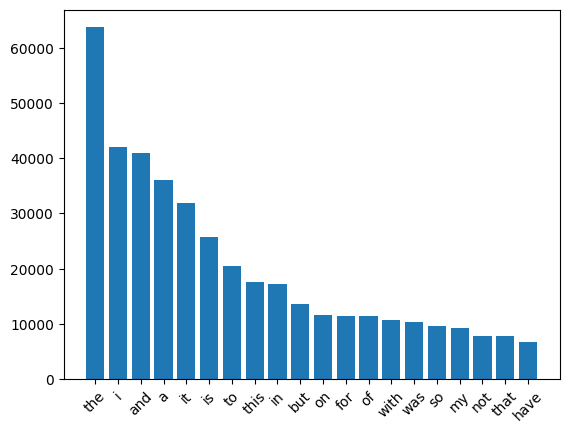

In [17]:
plot_top_stopwords_barchart(data['Review Text'])

#### Most common Part-of-Speech Tag used in the review 

In [18]:
from collections import Counter

def get_most_common_pos(text,pos_tag):
    '''
    Returns the most common words in the passed dataframe column

    Parameters:
    text (pd.DataFrame Series): Pd Series containing the text column
    pos_tag (string): parts of speech tag as a string

    returns: 
    x (list): list of most common words  
    '''
    tokenized = []
    for doc in nlp.pipe(text):
        for token in doc:
            if not token.is_stop and not token.is_punct and token.pos_ == pos_tag:
                tokenized.append(token.text)

    counter=Counter(tokenized)
    most=counter.most_common()          
    
    return most

In [19]:
def plot_most_common_pos(most,num):
    ''' 
    plots the most common pos tag

    parameters:
    most: list of the most common pos tag
    num (int): number of common words to be plotted
    
    returns:nothing
    '''
    x, y= [], []
    for word,count in most[:num]:
        x.append(word)
        y.append(count)

    sns.barplot(x=y,y=x)

In [20]:
most_common_adj = get_most_common_pos(data['Review Text'],'ADJ')

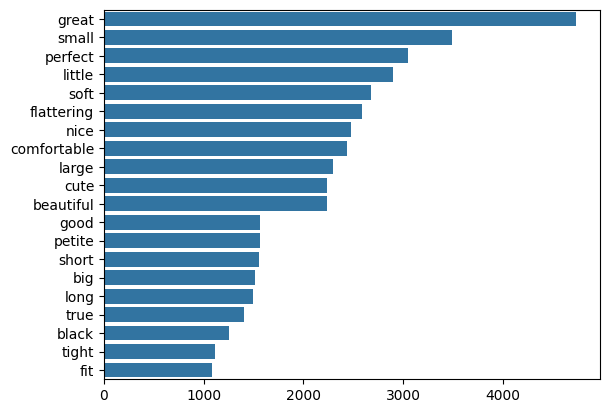

In [21]:
plot_most_common_pos(most_common_adj,20)

#### Finding patterns in the review text

In [22]:
from spacy.matcher import Matcher

def find_patterns(text,pattern):
    ''' 
    Find matching patterns in the passed text column

    parameters:
    text: a dataframe column containing text
    pattern: a list containing the pattern to be searched

    returns:
    matched_patterns: dictionary containing the patterns and its count
    '''
    matcher = Matcher(nlp.vocab)

    matcher.add("This is a sample text", pattern)

    matched_patterns = defaultdict(int)
    for doc in nlp.pipe(text):
        matches = matcher(doc)
        for match_id, start, end in matches:
            string_id = nlp.vocab.strings[match_id]  # Get string representation
            span = doc[start:end]  # The matched span
            matched_patterns[span.text] += 1
    
    return matched_patterns

In [23]:
def plot_patterns(matched_patterns,num):
    ''' 
    plot the top most patterns in the passed dictionary

    parameters:
    matched_patterns: dictionary containing the patterns and its count of occurence
    num: integer to plot the number of patterns

    returns: nothing
    '''
    x, y= [], []
    sorted_patterns = sorted(matched_patterns.items(), key=lambda x: x[1], reverse=True)
    top_patterns = sorted_patterns[:num]
    for pattern,count in top_patterns[:num]:
        x.append(pattern)
        y.append(count)

    sns.barplot(x=y,y=x)

In [24]:
pattern = [[{'POS':'ADJ'}, {'POS':'NOUN'}]]
#pattern = [[{"POS": "ADV", "OP": "?"},{"POS": "ADJ"},{"POS": "NOUN"}]]
matched_patterns = find_patterns(data['Review Text'],pattern)

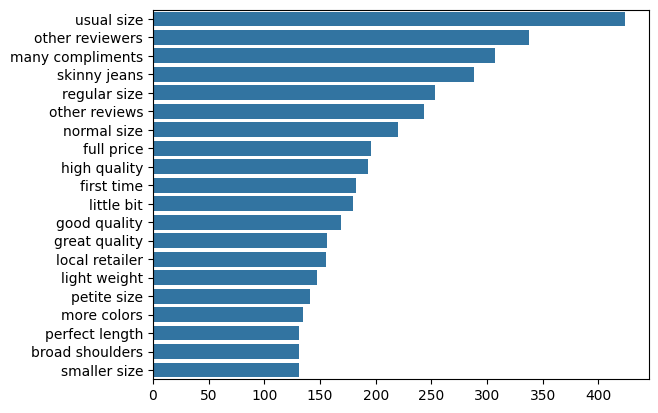

In [25]:
plot_patterns(matched_patterns,20)

#### Most common words using Wordcloud

In [26]:
import re
from wordcloud import STOPWORDS
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(plot_df,column):
    '''
    Creates a wordcloud for a specific column of the passed dataframe

    Parameters:
    data (pd.DataFrame): Pandas dataframe 
    column (text): name of the column to be plotted

    returns: nothing
    '''
    text = ' '.join(plot_df[column].astype(str).tolist())
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    stopwords = set(STOPWORDS)
    text = ' '.join(word for word in text.split() if word not in stopwords)

    wordcloud = WordCloud(width=800, height=400, background_color='white',max_words=100,
                        stopwords=stopwords,scale=3,random_state=1).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  
    plt.title(f'Word cloud for {column}')
    plt.show()

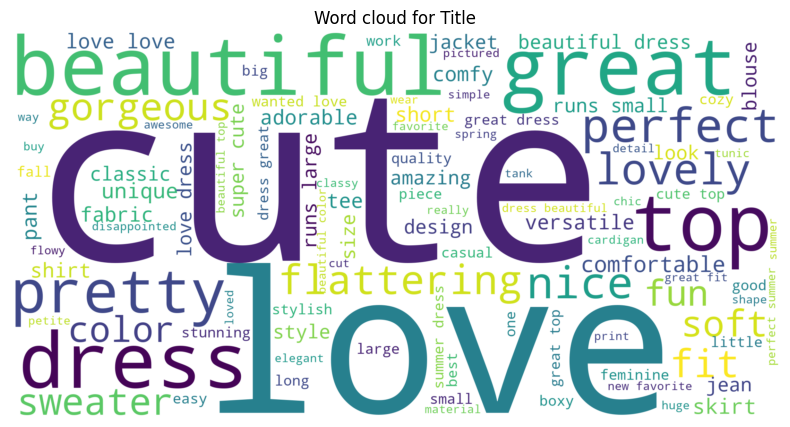

In [27]:
plot_wordcloud(data,'Title')

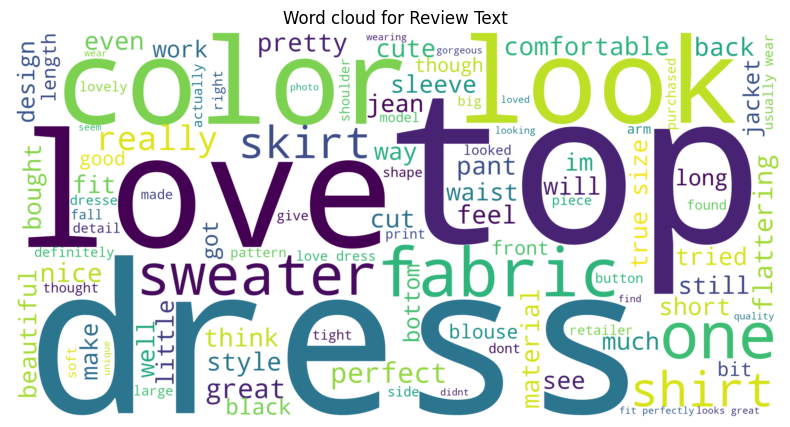

In [28]:
plot_wordcloud(data,'Review Text')

#### Data Exploration for categorical columns

In [29]:
def countplot_df(data,col_name):
    '''
    Creates a cpuntplot for a specific column of the passed dataframe

    Parameters:
    data (pd.DataFrame): Pandas dataframe 
    column (text): name of the column to be plotted

    returns: nothing
    '''
    fig, axes = plt.subplots(1,1,figsize = (10,5))
    sns.countplot(ax = axes,data=data,x = col_name,hue='Recommended IND')
    axes.tick_params(labelrotation=90)

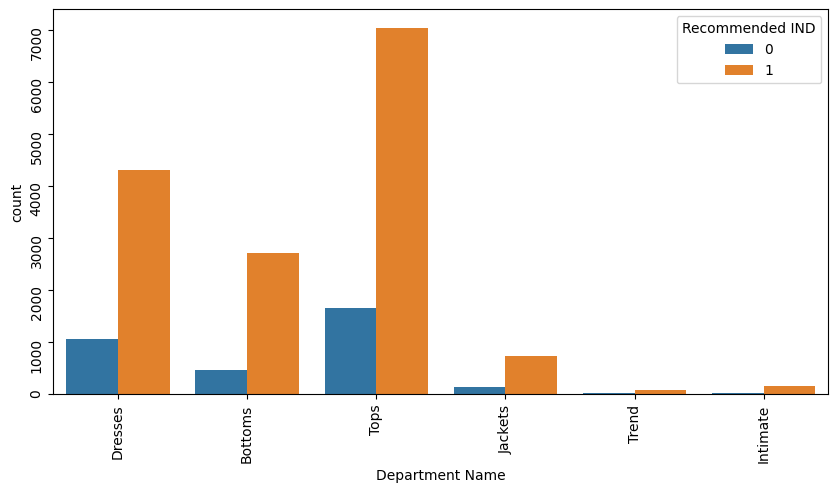

In [30]:
countplot_df(data,'Department Name')

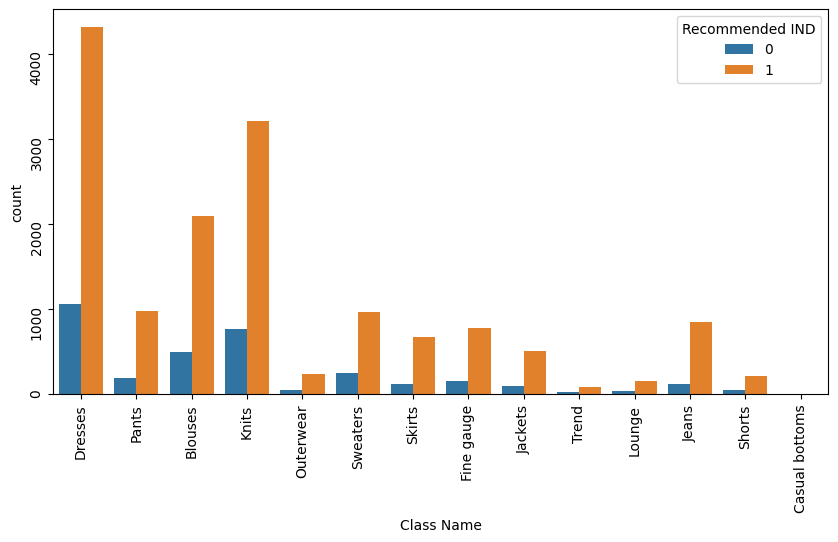

In [31]:
countplot_df(data,'Class Name')

#### Data Exploration for numerical columns

In [32]:
def histplot_df(data,col_name,bins_size='auto'):
    '''
    Creates a histogram for a specific column of the passed dataframe

    Parameters:
    data (pd.DataFrame): Pandas dataframe 
    column (text): name of the column to be plotted
    bins_size: size of the bin (numerical value)

    returns: nothing
    '''
    fig, ax = plt.subplots(figsize = (8,4))
    sns.histplot(ax = ax,data=data,x = col_name,bins=bins_size,shrink=0.75)
    ax.tick_params(axis = 'x',labelrotation=90)
    ax.tick_params(axis = 'y',labelrotation=0)
    #ax.set_xlim(0,20)
    #ax.set_xticks([])
    ax.set_ylabel('Count')
    ax.set_xlabel(f'{col_name}')
    ax.set_title(f"Histogram Plot for the Column {col_name}")

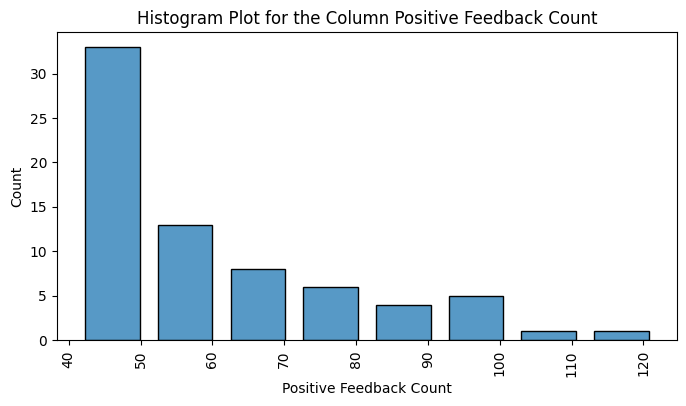

In [33]:
histplot_df(data[data['Positive Feedback Count']>40],"Positive Feedback Count")

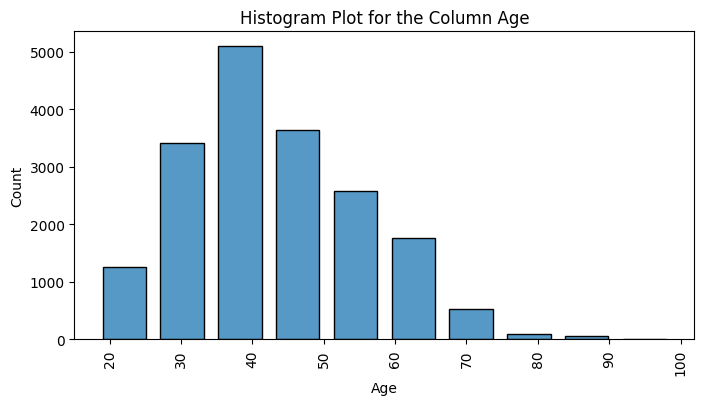

In [34]:
histplot_df(data,"Age",10)

## Building Pipeline

In [35]:
from sklearn.pipeline import Pipeline

Splitting the features into numerical, categorical and text for processing via pipeline. **Clothing ID** is dropped from the feature set because it does not support the model fitting or prediction in any way. It is an ID column 

In [36]:
num_features = (X.select_dtypes(exclude=['object']).columns.drop(['Clothing ID']))
print('Numerical features:', num_features)

cat_features = (X.select_dtypes(include=['object']).columns.drop(['Title','Review Text']))
print('Categorical features:', cat_features)

title_feature = (X[['Title']].columns)
print ('Title feature:', title_feature)

review_feature = (X[['Review Text']].columns)
print ('Review feature:', review_feature)

Numerical features: Index(['Age', 'Positive Feedback Count'], dtype='object')
Categorical features: Index(['Division Name', 'Department Name', 'Class Name'], dtype='object')
Title feature: Index(['Title'], dtype='object')
Review feature: Index(['Review Text'], dtype='object')


Handling missing values using simple imputer and scaling the values of numerical feature 

In [37]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

num_pipeline = Pipeline([
    (
        'imputer',
        SimpleImputer(strategy='mean'),
    ),
    (
        'scaler',
        MinMaxScaler((0,1)),
    ),
])

num_pipeline

,steps,"[('imputer', ...), ('scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,feature_range,"(0, ...)"


Performing ordinal encoding, imputing and one hot encoding the categorical features using a pipeline  

In [38]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    (
        'ordinal_encoder',
        OrdinalEncoder(
            handle_unknown='use_encoded_value',
            unknown_value=-1,
        )
    ),    
    (
        'imputer',
        SimpleImputer(
            strategy='most_frequent',
        )
    ),
    (
        'cat_encoder',
        OneHotEncoder(
            sparse_output=False,
            handle_unknown='ignore',
        )
    ),
])

cat_pipeline

,steps,"[('ordinal_encoder', ...), ('imputer', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,categories,'auto'
,dtype,<class 'numpy.float64'>
,handle_unknown,'use_encoded_value'
,unknown_value,-1
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


In [39]:
from sklearn.base import BaseEstimator, TransformerMixin
tab = str.maketrans("","",string.punctuation)

In [40]:
class CountWords(BaseEstimator, TransformerMixin):
    """
    A scikit-learn compatible transformer that counts the number of words in each text.

    This transformer takes an iterable of strings and returns a 2D array-like structure
    of shape (n_samples, 1), where each value represents the word count for the corresponding sample.

    Example:
        >>> X = ["Hello world", "One", ""]
        >>> CountWords().fit_transform(X)
        [[2], [1], [0]]

    Notes:
        - Words are counted using `text.split()`, which splits on whitespace.
        - Empty strings return 0.
        - The transformer is stateless; `fit` does nothing and returns self.

    Methods:
        fit(X, y=None):
            No-op for compatibility; returns self.
        transform(X):
            Returns a list of lists with word counts for each sample.

    Returns:
        list[list[int]]: Shape (n_samples, 1), each inner list contains the word count.
    """
    def __init__(self):
        return None

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [[len(text.split())] for text in X]

Pipeline to create word counts in the passed text

In [41]:
words_counts_pipeline = Pipeline([
    (
        'words_counter',
        CountWords(),
    ),
    (
        'scaler',
        MinMaxScaler((0,1)),
    ),
])
words_counts_pipeline

,steps,"[('words_counter', ...), ('scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,feature_range,"(0, ...)"
,copy,True
,clip,False


In [42]:
class NERCounter(BaseEstimator, TransformerMixin):
    """
    A scikit-learn compatible transformer that counts named entities per label
    using a provided spaCy-like NLP pipeline.

    This transformer expects an iterable of texts, runs NER on each text via
    ``self.nlp`` (e.g., a spaCy pipeline), and returns a list of dictionaries.
    Each dictionary maps entity labels (e.g., "PERSON", "ORG") to their counts
    in the corresponding text. If ``labels`` is provided, only those labels are
    counted; otherwise, all entity labels found by the model are counted.

    Typical usage is to chain this with ``DictVectorizer`` to obtain a numeric
    feature matrix suitable for machine learning models.

    Example:
        >>> import spacy
        >>> from sklearn.feature_extraction import DictVectorizer
        >>> nlp = spacy.blank("en")
        >>> # (In practice, load an NER-enabled model, e.g. `spacy.load("en_core_web_sm")`)
        >>> ner = NERCounter(nlp, labels=["PERSON", "ORG"])
        >>> X = ["Alice works at Acme Corp.", "Bob joined Foo Inc. in 2020."]
        >>> dicts = ner.fit_transform(X)
        >>> dicts
        [{'PERSON': 1, 'ORG': 1}, {'PERSON': 1, 'ORG': 1}]
        >>> vec = DictVectorizer(sparse=True)
        >>> X_vec = vec.fit_transform(dicts)  # shape (2, 2)

    Notes:
        - The provided ``nlp`` object must expose a callable that accepts a string
          and returns a Doc-like object with a ``.ents`` iterable, where each
          entity has ``.label_``.
        - Non-string inputs are treated as empty strings.
        - The transformer is stateless; ``fit`` is a no-op and returns ``self``.

    Args:
        nlp: A spaCy-like NLP pipeline with named entity recognition enabled.
        labels (Iterable[str] | None, optional): If set, limit counting to these
            entity labels. If ``None``, count all labels found. Defaults to ``None``.

    Returns:
        During ``transform``, returns ``List[Dict[str, int]]`` where each dict maps
        entity labels to counts for one sample.

    """

    def __init__(self, nlp, labels=None):
        self.nlp = nlp
        self.labels = labels
    def fit(self, X, y=None): 
        return self
    def transform(self, X):
        ents = []
        for text in X:
            doc = self.nlp(text if isinstance(text, str) else "")    
            counts = {}
            for ent in doc.ents:
                if self.labels is None or ent.label_ in self.labels:
                    counts[ent.label_] = counts.get(ent.label_, 0) + 1
            ents.append(counts)
        return ents

In [43]:
class NERTransformer(BaseEstimator, TransformerMixin):
    """
    A scikit-learn compatible transformer that extracts named entities using a
    provided spaCy-like NLP pipeline and returns a single string per sample
    containing space-separated `<LABEL>:<TEXT>` pairs.

    This transformer expects an iterable of texts, runs NER via ``self.nlp``,
    and for each input text produces a single string with entities formatted as
    ``"LABEL:entity_text"`` separated by spaces. It is typically followed by a
    text vectorizer (e.g., ``TfidfVectorizer``) to convert the strings into
    numeric features.

    Example:
        >>> import spacy
        >>> from sklearn.feature_extraction.text import TfidfVectorizer
        >>> nlp = spacy.load("en_core_web_sm")
        >>> ner = NERTransformer(nlp)
        >>> X = ["Alice works at Acme Corp in Berlin."]
        >>> ner_strings = ner.fit_transform(X)
        >>> ner_strings
        ['PERSON:Alice ORG:Acme Corp GPE:Berlin']
        >>> vec = TfidfVectorizer()
        >>> X_vec = vec.fit_transform(ner_strings)  # shape: (1, n_features)

    Notes:
        - Non-string inputs are treated as empty strings.
        - Output is a 1D iterable of strings (length = n_samples), not numeric.
          Use a text vectorizer next if you need numeric features.
        - The transformer is stateless; ``fit`` is a no-op that returns ``self``.
        - If performance matters on large batches, consider replacing the per-item
          calls with ``self.nlp.pipe(X, ...)`` for faster, batched processing.

    Args:
        nlp: A spaCy-like NLP pipeline with NER enabled (e.g., ``spacy.load("en_core_web_sm")``).

    Returns:
        During ``transform``, returns ``List[str]`` where each string contains
        space-separated ``"LABEL:TEXT"`` pairs for the corresponding sample.

    """

    def __init__(self, nlp):
        import spacy
        self.spacy = spacy
        self.nlp = nlp
    def fit(self, X, y=None): 
        return self
    def transform(self, X):
        ents = []
        for text in X:
            doc = self.nlp(text if isinstance(text, str) else "")
            ents.append(" ".join([f"{e.label_}:{e.text}" for e in doc.ents]))
        return ents

In [44]:
class POSCounter(BaseEstimator, TransformerMixin):
    """
    Count part-of-speech (POS) tags per input text using a spaCy-like pipeline.

    Parameters
    ----------
    nlp : callable
        A spaCy-like pipeline that, when called with a string, returns a Doc-like
        object whose tokens expose the attribute ``pos_``.

    Returns
    -------
    List[Dict[str, int]]
        For each input sample, a dictionary mapping POS tag strings (e.g., "NOUN",
        "VERB", "ADJ") to their counts.

    Notes
    -----
    - Non-string inputs are coerced to empty strings.
    - This transformer is stateless; ``fit`` is a no-op.
    - Combine with :class:`sklearn.feature_extraction.DictVectorizer` to convert
      the list of dicts into a numeric feature matrix for modeling.

    Examples
    --------
    >>> import spacy
    >>> from sklearn.feature_extraction import DictVectorizer
    >>> nlp = spacy.load("en_core_web_sm")
    >>> pos_counter = POSCounter(nlp)
    >>> dicts = pos_counter.fit_transform(["Alice runs fast.", "Acme builds cars."])
    >>> vec = DictVectorizer(sparse=True)
    >>> X_vec = vec.fit_transform(dicts)
    """

    def __init__(self, nlp):
        self.nlp = nlp
    def fit(self, X, y=None): 
        return self
    def transform(self, X):
        pos_count = []
        for text in X:
            doc = self.nlp(text if isinstance(text, str) else "")    
            counts = {}
            for token in doc:
                counts[token.pos_] = counts.get(token.pos_, 0) + 1
            pos_count.append(counts)
        return pos_count

In [45]:
class SpacyLemmatizer(BaseEstimator, TransformerMixin):
    """
    A scikit-learn compatible transformer that lemmatizes texts using a provided
    spaCy NLP pipeline and returns a list of lemmatized strings.

    For each input text, this transformer uses ``nlp.pipe`` (batched processing)
    to tokenize and lemmatize tokens, skipping stop words. Lemmas are optionally
    passed through a translation table (e.g., to strip punctuation) via ``str.translate(tab)``.
    The output is a 1D list of lemmatized strings, one per input sample.

    Example:
        >>> import spacy
        >>> nlp = spacy.load("en_core_web_sm")
        >>> lemmatizer = SpacyLemmatizer(nlp)
        >>> X = ["Alice was running quickly.", "They have been building cars."]
        >>> lemmatized = lemmatizer.fit_transform(X)
        >>> lemmatized  # doctest: +SKIP
        ['Alice run quickly', 'They have build car']

    Notes:
        - Non-string inputs in ``X`` may raise errors during processing; ensure
          inputs are strings or pre-coerce them.
        - Uses ``nlp.pipe(X)`` for efficiency. You can pass additional kwargs
          (e.g., ``batch_size``) by modifying the code if needed.
        - Stop words are excluded via ``token.is_stop``. If you prefer to keep
          stop words, remove the check.
        - ``tab`` must be defined in the surrounding scope if you intend to
          call ``token.lemma_.translate(tab)``; otherwise, drop ``translate(tab)``.
        - The transformer is stateless; ``fit`` is a no-op and returns ``self``.

    Args:
        nlp: A spaCy NLP pipeline (e.g., ``spacy.load("en_core_web_sm")``) that
            provides token lemmas via ``token.lemma_`` and stopword flags via
            ``token.is_stop``.

    Returns:
        During ``transform``, returns ``List[str]``—one lemmatized string per input sample.

    """

    def __init__(self, nlp):
        self.nlp = nlp

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        lemmatized_text = []
        for doc in self.nlp.pipe(X):
            lemmas = []
            for token in doc:
                if not token.is_stop:
                    lemmas.append(token.lemma_.translate(tab))
            lemmatized_text.append(' '.join(lemmas))
        return lemmatized_text

Pipeline to create TFIDF Vectorizer after lemmatizing the text

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
import numpy as np

tfidf_pipeline = Pipeline([
    ('lemmatizer',SpacyLemmatizer(nlp=nlp),),
    ('tfidf_vectorizer',TfidfVectorizer(max_features=500,min_df=3,stop_words='english',ngram_range=(1,2)),),
])
tfidf_pipeline

,steps,"[('lemmatizer', ...), ('tfidf_vectorizer', ...)]"
,transform_input,None
,memory,None
,verbose,False
,nlp,<spacy.lang.e...00289CC9BD650>
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None


Pipeline to create count features of Named entity recognition Labels

In [47]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import MaxAbsScaler
ner_counts_pipe = Pipeline([
    ("ner_counts", NERCounter(nlp=nlp, labels=nlp.get_pipe("ner").labels)),
    ("dictvec", DictVectorizer(sparse=True)),
    ("scale", MaxAbsScaler())
])

Pipeline to create count features for Parts-of-Speech tag

In [48]:
from sklearn.feature_extraction import DictVectorizer
pos_counts_pipe = Pipeline([
    ("pos_counts", POSCounter(nlp=nlp)),
    ("dictvec", DictVectorizer(sparse=True)),
    ("scale", MaxAbsScaler())
])

Column transformer to merge all the Preprocessing pipelines

In [49]:
from sklearn.compose import ColumnTransformer

feature_engineering = ColumnTransformer([
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features),
        ('tfidf_title', tfidf_pipeline, 'Title'),
        ('tfidf_review', tfidf_pipeline, 'Review Text'),
        ('review_pos_count', pos_counts_pipe, 'Review Text'),
        ('words_count_title',words_counts_pipeline,'Title'),
        ('words_count_review',words_counts_pipeline,'Review Text'),
],
        remainder="drop",
        verbose_feature_names_out=False,
        sparse_threshold=1.0
)

feature_engineering

,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,1.0
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


Pipeline for Features and Support vector classifcation

In [80]:
# train a support vector machine classifier using a pipeline
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
model_pipeline = Pipeline([
                            ('features',feature_engineering), 
                            ('svc',SVC(random_state=27))
                        ])
model_pipeline

,steps,"[('features', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,1.0
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False


In [81]:
# print all parameters that can be tuned using grid search
param_list = list(model_pipeline.get_params().keys())
param_list

['memory',
 'steps',
 'transform_input',
 'verbose',
 'features',
 'svc',
 'features__force_int_remainder_cols',
 'features__n_jobs',
 'features__remainder',
 'features__sparse_threshold',
 'features__transformer_weights',
 'features__transformers',
 'features__verbose',
 'features__verbose_feature_names_out',
 'features__num',
 'features__cat',
 'features__tfidf_title',
 'features__tfidf_review',
 'features__review_pos_count',
 'features__words_count_title',
 'features__words_count_review',
 'features__num__memory',
 'features__num__steps',
 'features__num__transform_input',
 'features__num__verbose',
 'features__num__imputer',
 'features__num__scaler',
 'features__num__imputer__add_indicator',
 'features__num__imputer__copy',
 'features__num__imputer__fill_value',
 'features__num__imputer__keep_empty_features',
 'features__num__imputer__missing_values',
 'features__num__imputer__strategy',
 'features__num__scaler__clip',
 'features__num__scaler__copy',
 'features__num__scaler__featur

## Training Pipeline

Dropping **Clothing ID** Feature during model fitting

In [82]:
model_pipeline.fit(X_train.drop(['Clothing ID'],axis=1), y_train)

,steps,"[('features', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,1.0
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False


## Evaluating Pipeline

In [51]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc

In [83]:
with open("model_base.pkl", "wb") as f:
    pickle.dump(model_pipeline, f)

In [52]:
with open("model_base.pkl", "rb") as f:
    model_pipeline = pickle.load(f)

In [84]:
y_pred = model_pipeline.predict(X_test)

In [106]:
y_pred_train = model_pipeline.predict(X_train)

In [54]:
def calc_classification_metrics(y_test,y_pred):
    """
    Calculate and display common classification metrics for a model.

    This function computes Accuracy, Precision, Recall, and F1-score for the
    given true labels and predicted labels, prints them to the console, and
    returns them as a tuple.

    Parameters:
        y_test (array-like): True labels for the test set.
        y_pred (array-like): Predicted labels from the model.

    Returns:
        tuple:
            A tuple containing:
            - accuracy (float): Overall accuracy of the model.
            - precision (float): Precision score.
            - recall (float): Recall score.
            - f1 (float): F1-score.
    """
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy:', accuracy)

    precision = precision_score(y_test, y_pred)
    print("The precision of the model is {}.".format(precision))

    recall = recall_score(y_test, y_pred)
    print("The Recall of the model is {}.".format(recall))

    f1 = f1_score(y_test, y_pred)
    print("The F1 of the model is {}.".format(f1))

    classification_list = {"Accuracy":accuracy,"Precision":precision,"Recall":recall,"F1-Score":f1}
    return classification_list

In [55]:
def display_confusion_matrix(y_test,y_pred,model):
    """
    Display a confusion matrix for a classification model's predictions.

    This function computes the confusion matrix using the true labels and predicted
    labels, then visualizes it using scikit-learn's ConfusionMatrixDisplay.

    Parameters:
        y_test (array-like): True labels for the test set.
        y_pred (array-like): Predicted labels from the model.
        model (Pipeline or estimator): A fitted scikit-learn model or pipeline.
            Must expose `named_steps['svc'].classes_` for label ordering.

    Returns:
        None: Displays the confusion matrix plot.
    """ 

    cm = confusion_matrix(y_test, y_pred, labels=model.named_steps['svc'].classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.named_steps['svc'].classes_)
    disp.plot()

Evaluation Metrics for Training Set 

In [107]:
model_metrics_train = calc_classification_metrics(y_train,y_pred_train)

Accuracy: 0.9352292582996927
The precision of the model is 0.937992125984252.
The Recall of the model is 0.9857406723309937.
The F1 of the model is 0.9612738211030657.


Evaluation Metrics for Test set

In [85]:
model_metrics = calc_classification_metrics(y_test,y_pred)

Accuracy: 0.8899728997289973
The precision of the model is 0.9061148857319333.
The Recall of the model is 0.9664031620553359.
The F1 of the model is 0.9352884921899904.


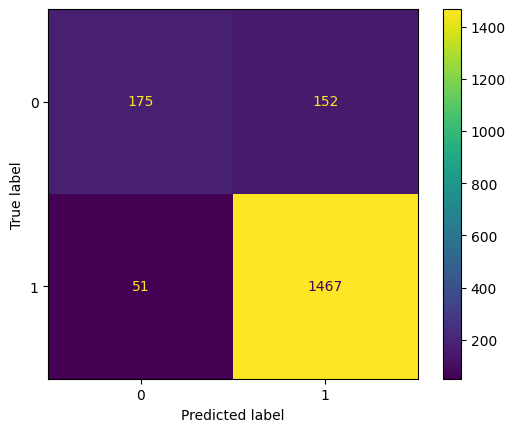

In [86]:
display_confusion_matrix(y_test,y_pred,model_pipeline)

## Fine-Tuning Pipeline

### RandomsearchCV

In [70]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import recall_score, make_scorer

from sklearn.model_selection import StratifiedKFold
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=27)

recall = make_scorer(recall_score, pos_label=0)

param_grid = [{'svc__C': [1,3,5,8,10,12],
               'svc__gamma': [0.08, 0.1, 0.12]
               }]

param_search = RandomizedSearchCV(
    estimator=model_pipeline,
    param_distributions=param_grid,
    n_iter=6,               # Try 6 different combinations of parameters
    cv=cv_strategy,         # Use 5-fold cross-validation
    n_jobs=-1,              # Use all available processors (for multiprocessing)
    refit=True,             # Refit the model using the best parameters found
    verbose=3,              # Output of parameters, score, time
    random_state=27,
)

param_search.fit(X_train.drop(['Clothing ID'],axis=1), y_train)

# Retrieve the best parameters
param_search.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


{'svc__gamma': 0.08, 'svc__C': 3}

In [95]:
model_best = param_search.best_estimator_
model_best

NameError: name 'param_search' is not defined

In [58]:
with open("model_best.pkl", "wb") as f:
    pickle.dump(model_best, f)

with open("model_best.pkl", "rb") as f:
    model_best = pickle.load(f)

In [96]:
model_best

,steps,"[('features', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,1.0
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False


In [59]:
y_pred_best = model_best.predict(X_test)

In [108]:
y_pred_best_train = model_best.predict(X_train)

Evaluation Metrics for Test set

In [60]:
model_best_metrics = calc_classification_metrics(y_test,y_pred_best)

Accuracy: 0.8937669376693766
The precision of the model is 0.9188846641318125.
The Recall of the model is 0.9552042160737813.
The F1 of the model is 0.9366925064599483.


Evaluation Metrics for Training set

In [110]:
model_best_metrics_train = calc_classification_metrics(y_train,y_pred_best_train)

Accuracy: 0.9419172139543291
The precision of the model is 0.9496387438300308.
The Recall of the model is 0.9807905430365719.
The F1 of the model is 0.9649632914152795.


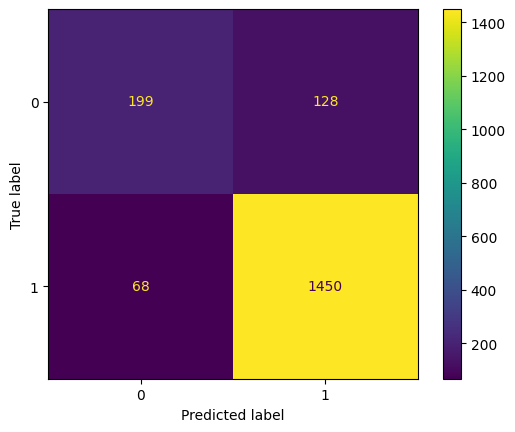

In [61]:
display_confusion_matrix(y_test,y_pred_best,model_best)

### Comparison between Best model and Base Model

Model Base has the following hyperparameters:

C = 1  
gamma = 'scale'  
kernel = 'rbf'  

Model Best has the following hyperparameters:
C = 3  
gamme = 0.08  
kernel = 'rbf'  

Comparing the evaluation metrics of both the models, no major improvement could be observed. Model best scores better on precision and loses on recall to the base model. This is very well seen on the F1-Score as it is more or less the same. 

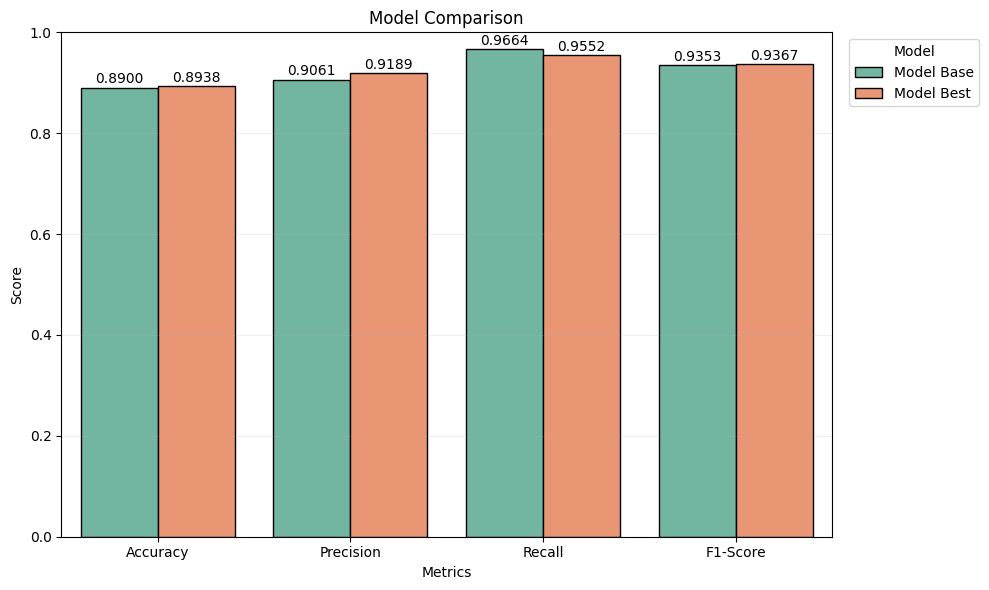

In [88]:
metrics = {
    "Model Base": model_metrics,
    "Model Best": model_best_metrics,
}

metrics_df = pd.DataFrame(metrics).T 
metrics_df = metrics_df.reset_index().rename(columns={"index": "model"})
metrics_df_melt = metrics_df.melt(id_vars="model", var_name="metric", value_name="score")

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=metrics_df_melt,
    x="metric",
    y="score",
    hue="model",
    palette="Set2",
    edgecolor="black"
)

plt.ylim(0, 1.0)
plt.ylabel("Score")
plt.xlabel("Metrics")
plt.xticks(ticks=[0,1,2,3],labels=['Accuracy','Precision','Recall','F1-Score'])
plt.title("Model Comparison")
plt.legend(title="Model",loc='upper right',bbox_to_anchor=(1.2, 1))
plt.grid(axis="y", alpha=0.2)

for container in ax.containers:
    ax.bar_label(container,padding=1,fmt='%0.4f',label_type='edge')

plt.tight_layout()
plt.show()

In [63]:
def display_two_confusion_matrices(y_test,y_pred1,model1,y_pred2,model2,titles=("Model 1", "Model 2"),normalize=None):
    """
    Plot two confusion matrices side-by-side for easy comparison.

    Parameters
    ----------
    y_test : array-like
        True labels.
    y_pred1 : array-like
        Predicted labels from the first model.
    model1 : estimator or Pipeline
        First fitted model (used only to fetch `classes_` if available).
    y_pred2 : array-like
        Predicted labels from the second model.
    model2 : estimator or Pipeline
        Second fitted model (used only to fetch `classes_` if available).
    titles : tuple[str, str], optional
        Titles for the two subplots (default: ("Model 1", "Model 2")).
    normalize : {'true', 'pred', 'all', None}, optional
        Normalization mode passed to `confusion_matrix`.

    Returns
    -------
    None
        Displays the figure with two confusion matrices.
    """
    
    cm1 = confusion_matrix(y_test, y_pred1, labels=model1.named_steps['svc'].classes_, normalize=normalize)
    cm2 = confusion_matrix(y_test, y_pred2, labels=model2.named_steps['svc'].classes_, normalize=normalize)

    fig, axes = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

    disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=model1.named_steps['svc'].classes_)
    disp1.plot(ax=axes[0], cmap="binary", colorbar=False)
    axes[0].set_title(titles[0])

    disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=model2.named_steps['svc'].classes_)
    disp2.plot(ax=axes[1], cmap="binary", colorbar=False)
    axes[1].set_title(titles[1])

    for ax in axes:
        ax.set_xlabel("Predicted label")
        ax.set_ylabel("True label")

    plt.show()


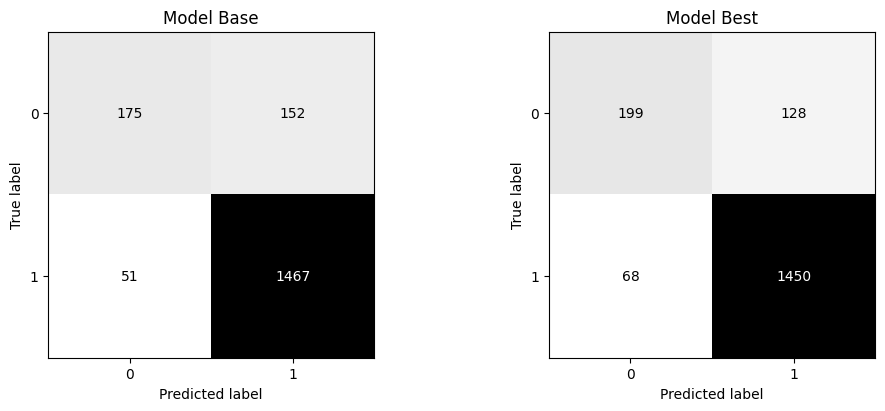

In [89]:
display_two_confusion_matrices(
    y_test,
    y_pred,
    model_pipeline,
    y_pred_best,
    model_best,
    titles=("Model Base", "Model Best"),
    normalize=None
)

From the confusion matrix, we can very well see the imbalance between classes. Both the models does not perform well on Class **0**. Comparatively, model best performs better than the model base. 

Classification report for Best Model

In [105]:
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.75      0.61      0.67       327
           1       0.92      0.96      0.94      1518

    accuracy                           0.89      1845
   macro avg       0.83      0.78      0.80      1845
weighted avg       0.89      0.89      0.89      1845



Classification report for Base Model

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.54      0.63       327
           1       0.91      0.97      0.94      1518

    accuracy                           0.89      1845
   macro avg       0.84      0.75      0.78      1845
weighted avg       0.88      0.89      0.88      1845



### ROC Curve and AUC

In [97]:
fpr_best, tpr_best, threshold_best = roc_curve(y_test, y_pred_best)
roc_auc_best = auc(fpr_best, tpr_best)

In [101]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr,roc_auc,title='Receiver Operating Characteristic'):
      """
      Plot the Receiver Operating Characteristic (ROC) curve.

      This function visualizes the ROC curve for a binary classifier using the
      provided false positive rates, true positive rates, and the computed AUC score.

      Args:
            fpr (array-like): False Positive Rates for different thresholds.
            tpr (array-like): True Positive Rates for different thresholds.
            roc_auc (float): Area Under the Curve (AUC) value for the ROC curve.

      Returns:
            None: Displays the ROC curve plot using matplotlib.
      """ 
      
      plt.figure()
      plt.plot(fpr, tpr, color='darkorange', lw=2,
               label='ROC curve (area = %0.2f)' % roc_auc)
      plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title(title)
      plt.legend(loc='lower right')
      plt.show()

Comparing the ROC-Curve and AUC, we could observe that the best model performs slightly better than the base model. A steep rise at the beginning means that the models have a better true positive rate at lower FPR. Also the area under curve for the best model is higher than the base model. 

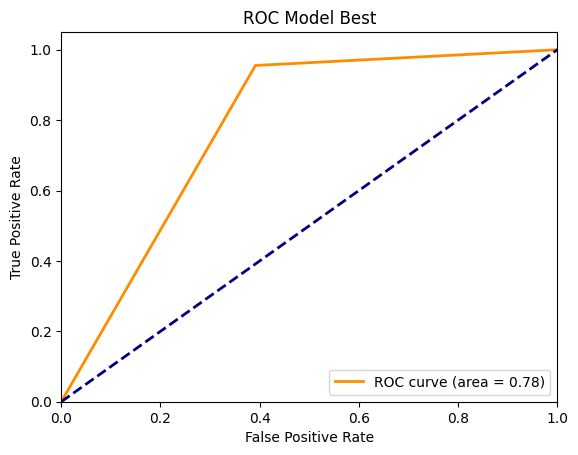

In [102]:
plot_roc_curve(fpr_best,tpr_best,roc_auc_best,title='ROC Model Best')

In [99]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

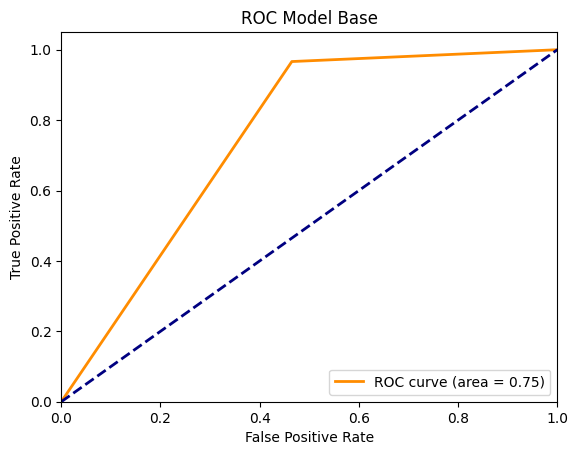

In [103]:
plot_roc_curve(fpr,tpr,roc_auc,title='ROC Model Base')

## Conclusion

After analysing the evaluation metrics of both the models, there seems to be no great difference in the model performance. F1-Score and accuracy of both the models are more or less the same. 

**Suggestions for future improvements**:  
1. GridSearchCV with more fine tuning - Since this was computationally expensive, I was not able to fine tune using GridSearchCV
2. Training and testing the model with balanced Dataset